# Welcome to Trade-a-gator
### A Signal-aggregated Trading Algo
In this Notebook we: -
- pull in market data (pricing for a specific instrument)
- using a number of indicators based on that data
- train our model
- and using that model, create our own indicator
- we then use that indicator to show how it would have done
Questions to ask
- can our trade-a-gator be used against any pricing data or instruments for only a specific segment

---

### Import Libraries and Dependencies

In [95]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Pandas dataFrame creation
- Read in CSVs, load in data and build up dataframes

In [218]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/kraken_btc_1hr.csv')

base_df = pd.read_csv(csv_path)
base_df
base_df = btc

,Timestamp,Open,High,Low,Close,Volume,Symbol
0,2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD
1,2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD
2,2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD
3,2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD
4,2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD
...,...,...,...,...,...,...,...
715,2019-09-25 12:00:00+00:00,8336.7,8363.9,8000.0,8305.7,1295.424881,BTC/USD
716,2019-09-25 13:00:00+00:00,8305.7,8442.5,8278.0,8388.2,459.187772,BTC/USD
717,2019-09-25 14:00:00+00:00,8392.0,8478.4,8375.0,8379.0,466.040826,BTC/USD
718,2019-09-25 15:00:00+00:00,8385.4,8430.0,8294.5,8294.5,259.406669,BTC/USD


### Set index, remove duplicates and N/As, calculate returns

In [219]:
# Set index
base_df.set_index(pd.to_datetime(base_df['Timestamp'], infer_datetime_format=True), inplace=True)
base_df.drop(columns=['Timestamp'], inplace=True)

# Drop NAs and calculate mean reversion (24 period)
base_df['Recent Runup'] = base_df['Close'].dropna().pct_change(24)#.shift(1)

# Drop NAs and calculate daily percent return
base_df['daily_return'] = base_df['Close'].dropna().pct_change()
base_df.head()

# Drop NAs and calculate VWAP
#base_df['VOL_cum'] = base_df['Volume'].cumsum()
#base_df['VWAP_cum'] = (((base_df['High'] + base_df['Low'] + base_df['Close'])/3)*base_df['Volume']).cumsum()
#base_df['VWAP'] = base_df['VWAP_cum']/base_df['VOL_cum']
base_df['VWAP'] = ((((base_df['High'] + base_df['Low'] + base_df['Close'])/3)*base_df['Volume']).cumsum())/base_df['Volume'].cumsum()
base_df.head(20)

,Open,High,Low,Close,Volume,Symbol,Recent Runup,daily_return,VWAP
Timestamp,,,,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN,NaN,10308.866667
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,NaN,-0.000883,10297.366974
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,NaN,0.001856,10299.866471
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,NaN,-0.004597,10269.979847
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,NaN,0.001169,10264.361214
2019-08-26 22:00:00+00:00,10274.6,10345.1,10274.6,10303.0,176.130751,BTC/USD,NaN,0.002764,10269.625123
2019-08-26 23:00:00+00:00,10303.0,10400.0,10302.9,10364.6,210.168525,BTC/USD,NaN,0.005979,10280.567246
2019-08-27 00:00:00+00:00,10364.4,10387.9,10312.3,10340.6,131.652337,BTC/USD,NaN,-0.002316,10285.455277
2019-08-27 01:00:00+00:00,10340.6,10354.5,10292.2,10308.1,52.733723,BTC/USD,NaN,-0.003143,10286.395531


## Calculate and add indicators
### Starting with the EMA ranges

In [221]:
# Set EMA ranges
ema_window_1 = 1
ema_window_2 = 2
ema_window_3 = 3
ema_window_4 = 4
ema_window_5 = 5
ema_window_6 = 6
ema_window_7 = 7
ema_window_8 = 8
ema_window_10 = 10
ema_window_15 = 15
ema_window_20 = 20
ema_window_24 = 24

# Construct Exponential Moving Average ranges
base_df['ema_window_1'] = base_df['Close'].ewm(halflife=ema_window_1).mean()
base_df['ema_window_2'] = base_df['Close'].ewm(halflife=ema_window_2).mean()
base_df['ema_window_3'] = base_df['Close'].ewm(halflife=ema_window_3).mean()
base_df['ema_window_4'] = base_df['Close'].ewm(halflife=ema_window_4).mean()
base_df['ema_window_5'] = base_df['Close'].ewm(halflife=ema_window_5).mean()
base_df['ema_window_6'] = base_df['Close'].ewm(halflife=ema_window_6).mean()
base_df['ema_window_7'] = base_df['Close'].ewm(halflife=ema_window_7).mean()
base_df['ema_window_8'] = base_df['Close'].ewm(halflife=ema_window_8).mean()
base_df['ema_window_10'] = base_df['Close'].ewm(halflife=ema_window_10).mean()
base_df['ema_window_15'] = base_df['Close'].ewm(halflife=ema_window_15).mean()
base_df['ema_window_20'] = base_df['Close'].ewm(halflife=ema_window_20).mean()
base_df['ema_window_24'] = base_df['Close'].ewm(halflife=ema_window_24).mean()

# Construct a crossover trading signal
#base_df['crossover_long'] = np.where(base_df['fast_close'] > base_df['slow_close'], 1.0, 0.0)
#base_df['crossover_short'] = np.where(base_df['fast_close'] < base_df['slow_close'], -1.0, 0.0)
#base_df['crossover_signal'] = base_df['crossover_long'] + base_df['crossover_short']

base_df.tail()

,Open,High,Low,Close,Volume,Symbol,Recent Runup,daily_return,VWAP,ema_window_1,...,ema_window_3,ema_window_4,ema_window_5,ema_window_6,ema_window_7,ema_window_8,ema_window_10,ema_window_15,ema_window_20,ema_window_24
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-09-25 12:00:00+00:00,8336.7,8363.9,8000.0,8305.7,1295.424881,BTC/USD,-0.141263,-0.003957,9956.871527,8336.263582,...,8408.899029,8460.051584,8517.383013,8576.988491,8636.185197,8693.424636,8799.354978,9012.214810,9167.372450,9263.512160
2019-09-25 13:00:00+00:00,8305.7,8442.5,8278.0,8388.2,459.187772,BTC/USD,-0.127756,0.009933,9951.408995,8362.231791,...,8404.628830,8448.619739,8500.660345,8556.391425,8612.806062,8668.092225,8771.821159,8984.035302,9140.830976,9238.593722
2019-09-25 14:00:00+00:00,8392.0,8478.4,8375.0,8379.0,466.040826,BTC/USD,-0.118798,-0.001097,9946.046764,8370.615896,...,8399.341616,8437.542989,8484.911482,8537.037793,8590.763683,8644.098740,8745.515101,8956.712878,9114.880216,9214.122757
2019-09-25 15:00:00+00:00,8385.4,8430.0,8294.5,8294.5,259.406669,BTC/USD,-0.126895,-0.010085,9942.940646,8332.557948,...,8377.712846,8414.784337,8460.262823,8510.576609,8562.833028,8615.083458,8715.311969,8926.808407,9086.935054,9187.942883
2019-09-25 16:00:00+00:00,8294.5,8373.6,8226.5,8323.8,467.840059,BTC/USD,-0.121452,0.003532,9937.258859,8328.178974,...,8366.590654,8400.308403,8442.597787,8490.199042,8540.297870,8590.908108,8689.093583,8899.577514,9060.939873,9163.342412


### Calculate signals

In [246]:
# Initialise the Signal Column
base_df['EMA Signal'] = 0.0
base_df['RR Signal'] = 0.0

# Generate the trading signal 0 or 1,
# 0: EMA-1 is below the EMA-20
# 1: EMA-1 is above the EMA-8
base_df['EMA Signal'] = np.where(
    base_df['Close'] > base_df['ema_window_24'], 1.0, 0.0
)

base_df['VWAP Signal'] = np.where(
    base_df['ema_window_2'] > base_df['VWAP'], 1.0, 0.0
)

base_df['RR Signal'] = np.where(
    base_df['Recent Runup'] < 0, 1.0, 0.0
)

# AA DELETE ME
#base_df['Signal'][short_window:] = np.where(
#    base_df['SMA50'][short_window:] > base_df['SMA100'][short_window:], 1.0, 0.0
#)

# Generate the Entry/Exit for later evaluation
base_df['EMA Entry/Exit'] = base_df['EMA Signal'].diff()
base_df['RR Entry/Exit'] = base_df['RR Signal'].diff()
base_df['VWAP Entry/Exit'] = base_df['VWAP Signal'].diff()

# Lag the signals
#variables_to_lag = ['EMA Entry/Exit','RR Entry/Exit',]
base_df[variables_to_lag] = base_df[variables_to_lag].shift(0)


In [247]:
# AA DELETE ME
base_df.head()
#base_df[base_df['Signal'] == 1.0]

,Open,High,Low,Close,Volume,Symbol,Recent Runup,daily_return,VWAP,ema_window_1,...,ema_window_10,ema_window_15,ema_window_20,ema_window_24,EMA Signal,RR Signal,EMA Entry/Exit,RR Entry/Exit,VWAP Signal,VWAP Entry/Exit
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN,NaN,10308.866667,10300.000000,...,10300.000000,10300.000000,10300.000000,10300.000000,0.0,0.0,NaN,NaN,0.0,NaN
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,NaN,-0.000883,10297.366974,10293.933333,...,10295.292372,10295.344891,10295.371162,10295.384300,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,NaN,0.001856,10299.866471,10303.114286,...,10300.538382,10300.457322,10300.417383,10300.397564,1.0,0.0,1.0,0.0,1.0,1.0
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,NaN,-0.004597,10269.979847,10281.506667,...,10290.046097,10290.327228,10290.466015,10290.534955,0.0,0.0,-1.0,0.0,1.0,0.0
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,NaN,0.001169,10264.361214,10277.941935,...,10286.514507,10286.884580,10287.069142,10287.161270,0.0,0.0,0.0,0.0,1.0,0.0


### Plot the ranges

In [248]:
import hvplot.pandas

# Visualize exit position relative to close price
ema_exit = base_df[base_df['EMA Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red', marker='v', size=100, legend=False, ylabel='Price in $', width=1000, height=400
)
#rr_exit = base_df[base_df['RR Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
#    color='blue', marker='v', legend=False, ylabel='Price in $', width=1000, height=400
#)
vwap_exit = base_df[base_df['VWAP Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='blue', marker='v', legend=False, ylabel='Price in $', width=1000, height=400
)



# Visualize entry position relative to close price
ema_entry = base_df[base_df['EMA Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green', marker='^', size=100, legend=False, ylabel='Price in $', width=1000, height=400
)
#rr_entry = base_df[base_df['RR Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
#    color='blue', marker='^', legend=False, ylabel='Price in $', width=1000, height=400
#)
vwap_entry = base_df[base_df['VWAP Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='blue', marker='^', legend=False, ylabel='Price in $', width=1000, height=400
)

# Visualize close price for the investment
instrument_close = base_df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = base_df[['ema_window_1', 'ema_window_2', 'ema_window_3', 'ema_window_4',
                       'ema_window_5', 'ema_window_6', 'ema_window_7', 'ema_window_8',
                       'ema_window_10', 'ema_window_15', 'ema_window_24'
                      ]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)
moving_avg_10_20 = base_df[['ema_window_10', 'ema_window_20']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize VWAP
vwap = base_df[['VWAP']].hvplot(
    #line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
#entry_exit_plot = instrument_close * moving_avgs * ema_entry * rr_entry * ema_exit * rr_exit
#entry_exit_plot = instrument_close * moving_avgs * rr_entry * rr_exit
#entry_exit_plot = instrument_close * moving_avgs * ema_entry * ema_exit
entry_exit_plot = instrument_close * moving_avg_10_20 * vwap * vwap_entry * vwap_exit
entry_exit_plot#.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Timestamp]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Timestamp]   (value)
   .Curve.II         :Curve   [Timestamp]   (VWAP)
   .Scatter.Close.I  :Scatter   [Timestamp]   (Close)
   .Scatter.Close.II :Scatter   [Timestamp]   (Close)

<AxesSubplot:xlabel='Timestamp'>

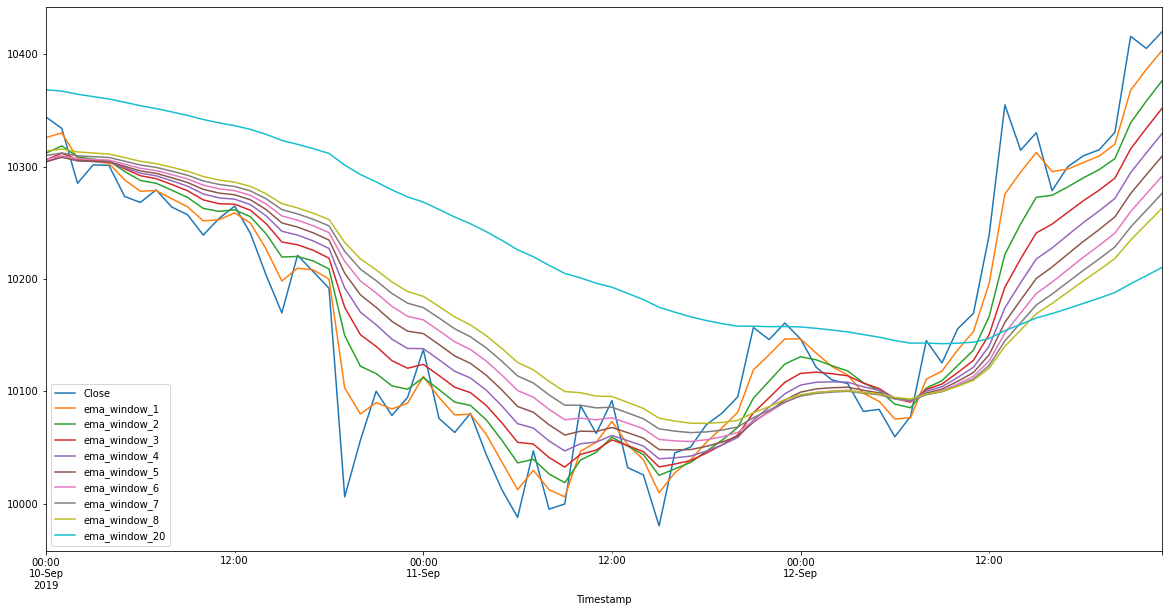

In [78]:
# Plot the EMA ranges
# American Date Format
base_df['09-10-19':'09-12-19'][['Close', 'ema_window_1', 'ema_window_2', 'ema_window_3',  'ema_window_4',
                                'ema_window_5', 'ema_window_6', 'ema_window_7', 'ema_window_8',
                                'ema_window_20'#, 'ema_window_15'#, 'ema_window_20'
                               ]].plot(figsize=(20,10))

<AxesSubplot:xlabel='Timestamp'>

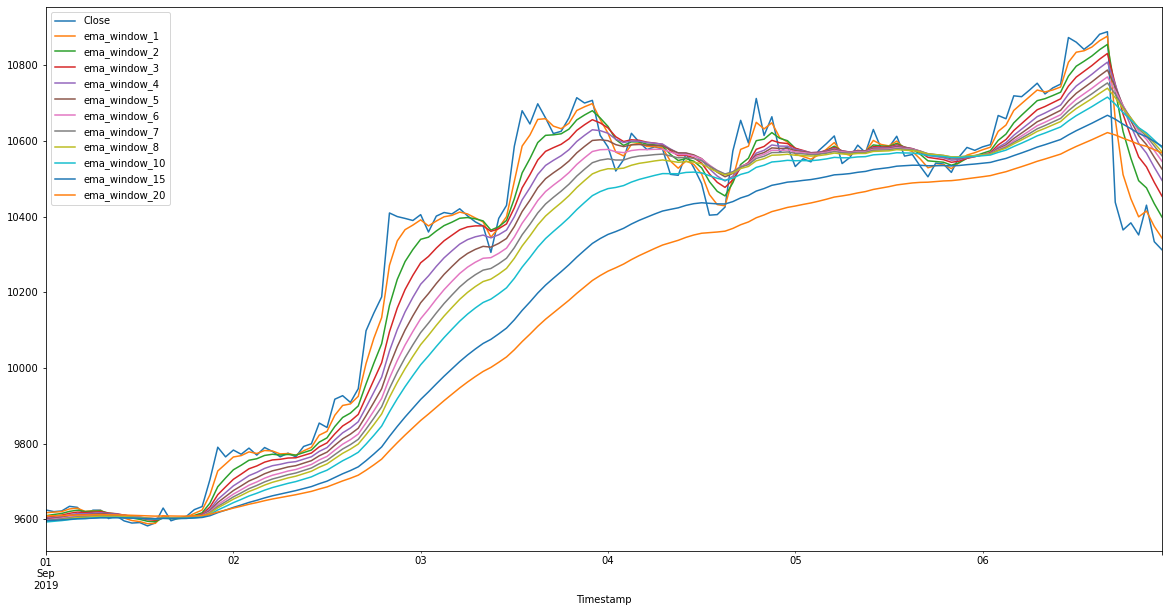

In [81]:
base_df['09-01-19':'09-06-19'][['Close', 'ema_window_1', 'ema_window_2', 'ema_window_3',  'ema_window_4',
                                'ema_window_5', 'ema_window_6', 'ema_window_7', 'ema_window_8',
                                'ema_window_10', 'ema_window_15', 'ema_window_20']].plot(figsize=(20,10))

-- ichi moku (20, 60, 120, 30)
-- stochastic ()
-- rsi ()
-- hash-rate (BTC)

<AxesSubplot:xlabel='Timestamp'>

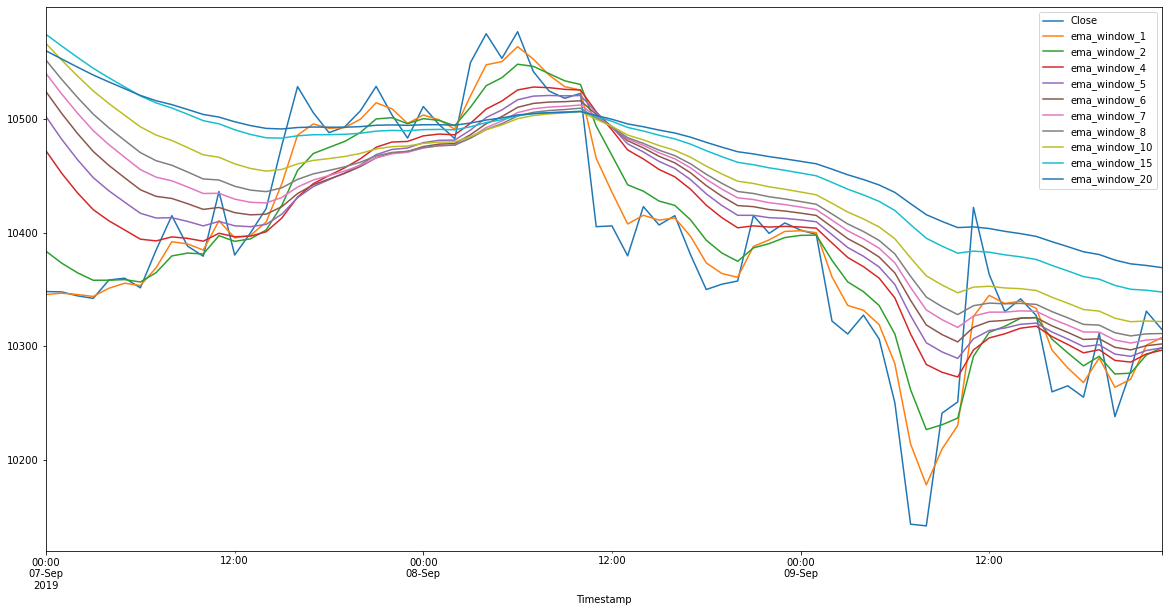

In [86]:
base_df['09-07-19':'09-09-19'][['Close', 'ema_window_1', 'ema_window_2', 'ema_window_4',
                                'ema_window_5', 'ema_window_6', 'ema_window_7', 'ema_window_8',
                                'ema_window_10', 'ema_window_15', 'ema_window_20'
                               ]].plot(figsize=(20,10))

In [237]:
#  Quick datareader test
#from pandas_datareader import data
#goog = data.DataReader('GOOG', start='2020', end='2021', data_source='yahoo')
#goog.tail()
goog['01-09-20':'14-09-20']

#btc = data.DataReader('BTC-USD', start='2020', end='2021', data_source='yahoo')
btc.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500
2020-12-30,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,28840.953125
2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,4.675496e+10,29001.720703
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,4.073030e+10,29374.152344


# OLIVER AREA

# BRIAN AREA

# CHUCK AREA